# eCommerce Product Recommendation
### Part 1: Data Cleaning & Quality Check

#  Load Raw Data

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
sns.set()

In [2]:
aisles = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/aisles.csv')
departments = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/departments.csv')
order_products_prior = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/order_products_prior.csv')
order_products_train = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/order_products_train.csv')
orders = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/orders.csv')
products = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/products.csv')
#all_data = pd.read_csv('all_data.csv')

#data description: https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b


In [3]:
print(aisles.shape)
print(departments.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(793924, 4)
(53704, 4)
(82683, 7)
(49688, 4)


# Data Exploration

### Build order history table `prior_order_details`

In [4]:
# Build prior order details table for data exploration
prior_order_details = order_products_prior.merge(orders, on="order_id")

In [5]:
# Covert dow to string for better visualization
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Monday" if x==1 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Friday" if x==5 else x)
prior_order_details["order_dow"] = prior_order_details["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [6]:
prior_order_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,Saturday,8,10.0
1,12,15221,2,1,152610,prior,22,Saturday,8,10.0
2,12,43772,3,1,152610,prior,22,Saturday,8,10.0
3,12,37886,4,1,152610,prior,22,Saturday,8,10.0
4,12,37215,5,0,152610,prior,22,Saturday,8,10.0


### Visualize order frequency on DoW

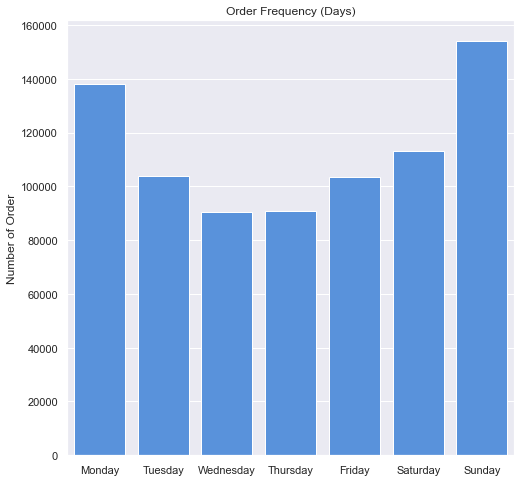

In [10]:

#Frequency of Order Based on Days
plt.figure(figsize = (8,8))
ax = sns.countplot(color = '#4390F1', x="order_dow",data=prior_order_details,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Order Frequency (Days)")
plt.xlabel("")
plt.ylabel("Number of Order")
plt.show()

### Visualize order frequency on HoD

/Users/jichenxi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


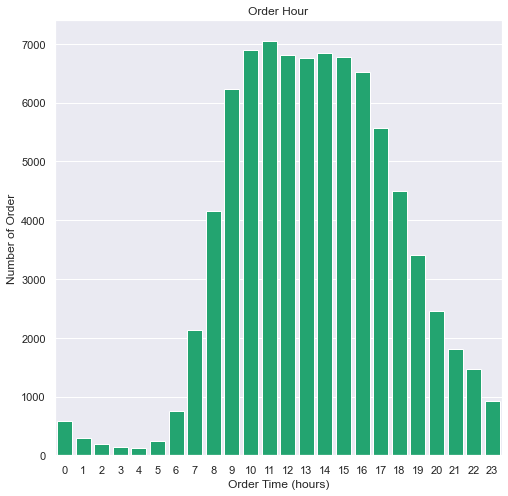

In [12]:
plt.figure(figsize = (8,8))
order_hours_counts = orders.groupby("order_id")["order_hour_of_day"].mean().reset_index()
order_hod_stats = order_hours_counts.order_hour_of_day.value_counts()
sns.barplot(order_hod_stats.index, order_hod_stats.values, color = '#0EB974')
plt.title("Order Hour")
plt.ylabel("Number of Order")
plt.xlabel('Order Time (hours)')
plt.show()

### Reorder Pattern Analysis

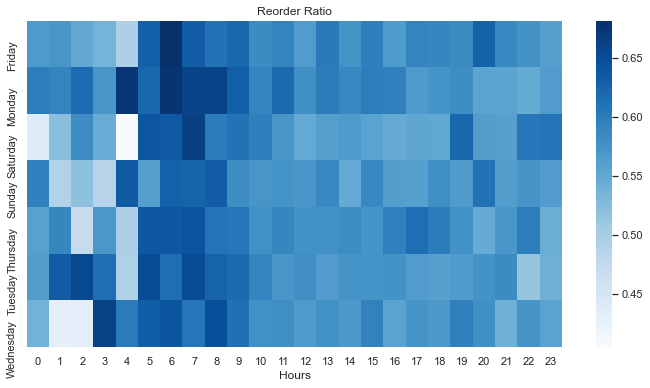

In [13]:
reorder_heatmap = prior_order_details.groupby(["order_dow", "order_hour_of_day"])["reordered"].mean().reset_index()
reorder_heatmap = reorder_heatmap.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(reorder_heatmap,cmap="Blues")
plt.title("Reorder Ratio")
plt.ylabel("")
plt.xlabel("Hours")
plt.show()

In [14]:
reorder_heatmap

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
Friday,0.567251,0.572034,0.550388,0.535354,0.496183,0.630058,0.680883,0.634418,0.610677,0.622049,...,0.574965,0.596886,0.566166,0.592004,0.589528,0.584020,0.627149,0.587676,0.575840,0.560068
Monday,0.599442,0.591837,0.617251,0.572581,0.674641,0.622010,0.676249,0.660356,0.660913,0.630201,...,0.587335,0.599543,0.596117,0.567598,0.573962,0.580768,0.555831,0.555922,0.547170,0.565366
Saturday,0.438291,0.522852,0.582677,0.546099,0.404908,0.639640,0.637555,0.663746,0.600063,0.610521,...,0.566792,0.556966,0.548146,0.552816,0.551941,0.621935,0.563981,0.559144,0.604764,0.608067
Sunday,0.596118,0.492063,0.519417,0.487805,0.635659,0.561798,0.628070,0.625713,0.632673,0.580712,...,0.547221,0.587734,0.563119,0.560964,0.579957,0.565647,0.610511,0.563980,0.573087,0.565396
Thursday,0.558081,0.590258,0.472973,0.570136,0.496124,0.637821,0.638517,0.643494,0.609187,0.604442,...,0.582064,0.573727,0.595724,0.614588,0.601024,0.576763,0.546398,0.571263,0.598508,0.543887
Tuesday,0.564184,0.633690,0.655172,0.613333,0.494382,0.651709,0.614837,0.650794,0.625297,0.619295,...,0.574408,0.573125,0.575652,0.564880,0.559078,0.566420,0.575627,0.583224,0.514218,0.541526
Wednesday,0.538576,0.431373,0.433333,0.661616,0.601307,0.632353,0.640719,0.607026,0.647715,0.612631,...,0.567920,0.594027,0.556999,0.574547,0.568327,0.596164,0.578599,0.540113,0.573974,0.557210


### Find the top 10 most reordered product, top 5 most reordered Aisles and Department based on prior data

In [15]:
# joining full prior data info/
prior_order_details_full = prior_order_details.merge(products, on = 'product_id')
prior_order_details_full = prior_order_details_full.merge(departments, on = 'department_id')
prior_order_details_full = prior_order_details_full.merge(aisles, on = 'aisle_id')
prior_order_details_full.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,12,30597,1,1,152610,prior,22,Saturday,8,10.0,French Vanilla Coffee Creamer,53,16,dairy eggs,cream
1,29292,30597,7,1,112604,prior,15,Wednesday,10,1.0,French Vanilla Coffee Creamer,53,16,dairy eggs,cream
2,50422,30597,41,0,75304,prior,28,Tuesday,8,12.0,French Vanilla Coffee Creamer,53,16,dairy eggs,cream
3,94545,30597,4,1,22499,prior,20,Thursday,9,30.0,French Vanilla Coffee Creamer,53,16,dairy eggs,cream
4,138033,30597,3,0,152610,prior,2,Thursday,13,13.0,French Vanilla Coffee Creamer,53,16,dairy eggs,cream


In [82]:
#top 10 most reordered products

prior_order_details_full.head()
reorder_pop = prior_order_details_full.groupby(["product_id"])["reordered"].mean().reset_index()
reorder_pop = reorder_pop.sort_values(by = 'reordered', ascending = False)
reorder_pop = reorder_pop.merge(products, on = 'product_id')
reorder_pop.head(20)

,product_id,reordered,product_name,aisle_id,department_id
0,10962,0.980000,Extra Strength Energy Shot,64,7
1,22195,0.979167,Kit's Organic Dark Chocolate Almond Coconut Fr...,3,19
2,30110,0.978723,Selects Very Low Sodium Chunk White Albacore T...,95,15
3,12995,0.974026,Cacao Hemp Walnut Bar,3,19
4,7277,0.973684,Parmesan Cheese Breadstick,78,19
5,26111,0.969231,Classic Roast Ground Coffee,26,7
6,17469,0.968750,Lo-Carb Energy Drink,64,7
7,34410,0.965517,Plastic Squared Plates,111,17
8,19161,0.964286,Organic Summer Strawberry Kefir,120,16
9,45018,0.958333,Chocolate Peppermint Stick,3,19


<AxesSubplot:xlabel='product_id', ylabel='reordered'>

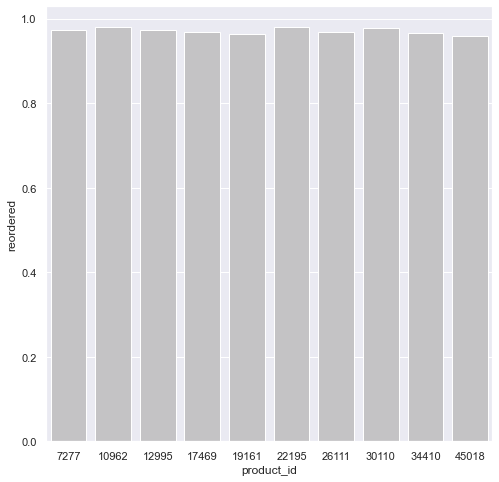

In [83]:
plt.figure(figsize = (8,8))
reorder_prod_vis = reorder_pop.iloc[0:10]
#reorder_prod_vis
sns.barplot(x=reorder_prod_vis.product_id, y=reorder_prod_vis.reordered, color = '#C4C2C6')

In [84]:
#top 5 most reordered aisles

prior_order_details_full.head()
reorder_pop = prior_order_details_full.groupby(["aisle_id"])["reordered"].mean().reset_index()
reorder_pop = reorder_pop.sort_values(by = 'reordered', ascending = False)
reorder_pop = reorder_pop.merge(aisles, on = 'aisle_id')
reorder_pop.head(10)

,aisle_id,reordered,aisle
0,84,0.771401,milk
1,115,0.737029,water seltzer sparkling water
2,86,0.710329,eggs
3,24,0.709361,fresh fruits
4,32,0.701109,packaged produce
5,91,0.699294,soy lactosefree
6,53,0.687934,cream
7,112,0.672784,bread
8,31,0.666962,refrigerated
9,64,0.666552,energy sports drinks


<AxesSubplot:xlabel='aisle', ylabel='reordered'>

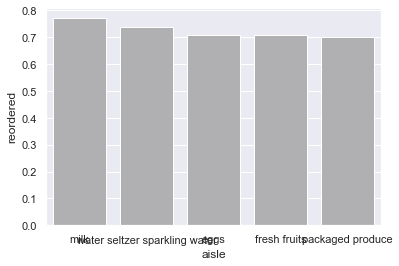

In [85]:
plt.figure(figsize = (6,4))
reorder_a_vis = reorder_pop.iloc[0:5]
#reorder_a_vis
sns.barplot(x=reorder_a_vis.aisle, y=reorder_a_vis.reordered, color = '#B0AFB2')

In [86]:
#top 5 most reordered departments

prior_order_details_full.head()
reorder_pop = prior_order_details_full.groupby(["department_id"])["reordered"].mean().reset_index()
reorder_pop = reorder_pop.sort_values(by = 'reordered', ascending = False)
reorder_pop = reorder_pop.merge(departments, on = 'department_id')
reorder_pop.head(10)

,department_id,reordered,department
0,16,0.660873,dairy eggs
1,7,0.657481,beverages
2,4,0.644304,produce
3,3,0.623313,bakery
4,20,0.604876,deli
5,10,0.575548,bulk
6,19,0.574820,snacks
7,5,0.564926,alcohol
8,12,0.558217,meat seafood
9,14,0.552675,breakfast


<AxesSubplot:xlabel='department', ylabel='reordered'>

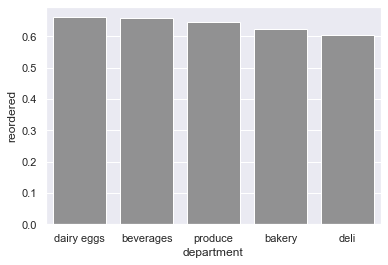

In [87]:
plt.figure(figsize = (6,4))
reorder_d_vis = reorder_pop.iloc[0:5]
#reorder_a_vis
sns.barplot(x=reorder_d_vis.department, y=reorder_d_vis.reordered, color = '#919192')


# Data Quality Check

### Validate the `days_since_prior_order` column in orders table

In [21]:
print("NaN count in days_since_prior_order column: ", orders[orders.days_since_prior_order.isnull()].shape[0])
print("order_number 1 count in orders table: ", orders[orders.order_number == 1].drop_duplicates().shape[0])
print("user_id count in orders table: ", orders.user_id.drop_duplicates().shape[0])

NaN count in days_since_prior_order column:  5000
order_number 1 count in orders table:  5000
user_id count in orders table:  5000


We can see that, in `orders.csv`, the number of rows that `days_since_prior_order` is missing = number of rows `order_number` ==1, which is also all user number.

### Validate Valid orders matching in the prior table

In [22]:
# in order csv, different eval_set and their counts：
orders.groupby(['eval_set'], as_index=False).agg(OrderedDict([('order_id','nunique')]))

,eval_set,order_id
0,prior,77683
1,train,5000


In [23]:
# verify if order_ids in order_products_prior.csv order_id all belong to orders.csv 
print("order_id count in prior: ", order_products_prior['order_id'].nunique())
print("order_id from prior found in orders: ", order_products_prior[order_products_prior.order_id.isin(orders.order_id)].order_id.nunique())

order_id count in prior:  77683
order_id from prior found in orders:  77683


### Validate orders matching in the train table

In [24]:
# verify: order_id in order_products_train.csv are also in orders.csv 
print("orders count in train: ", order_products_train['order_id'].nunique())
print("order_id from train found in orders: ", order_products_train[order_products_train.order_id.isin(orders.order_id)].order_id.nunique())

orders count in train:  5000
order_id from train found in orders:  5000


### Validate the intersection between prior and train table

In [25]:
# verify: order_ids in order_products_prior.csv and order_products_train.csv no overlaps/
print("order_id intersection between prior and train: ", pd.merge(order_products_prior, order_products_train, on = ['order_id']).shape[0])

order_id intersection between prior and train:  0


### Validate the user_id matching in prior and train set

In [26]:
# in orders.csv，count of users in different eval_set：
orders.groupby(['eval_set'], as_index=False).agg(OrderedDict([('user_id','nunique')]))

,eval_set,user_id
0,prior,5000
1,train,5000


prior and train all have 5000 users. 

In [27]:
prior_user_ids = set(orders[orders['eval_set'] == 'prior']['user_id'])
train_user_ids = set(orders[orders['eval_set'] == 'train']['user_id'])
print("user_ids in prior: ", len(prior_user_ids))
print("user_ids in train: ", len(train_user_ids))
print("intersection of prior and train: ", len(prior_user_ids.intersection(train_user_ids)))

user_ids in prior:  5000
user_ids in train:  5000
intersection of prior and train:  5000


### Validate order counts in the train dataset

In [28]:
(orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'train']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','count')]))
  .rename(columns={'order_number':'order_counts'})).sort_values(by=['order_counts']).head()

,user_id,order_counts
0,50,1
3336,135881,1
3335,135743,1
3334,135718,1
3333,135687,1


in train dataset, one order per user

### Validate the relative order of `order_num` in prior and train dataset

In [29]:
df_prior_order_max = (orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'prior']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','max')]))
  .rename(columns={'order_number':'prior_order_max'}))

In [30]:
df_train_order_min = (orders[orders.user_id.isin(train_user_ids)][orders.eval_set == 'train']
  .groupby(['user_id'], as_index=False)
  .agg(OrderedDict([('order_number','min')]))
  .rename(columns={'order_number':'train_order_min'}))

In [31]:
df_order_diff = pd.merge(df_prior_order_max, df_train_order_min, on = ['user_id'])
print("Rows count where prior_order_max >= train_order_min: ", 
      df_order_diff[df_order_diff.prior_order_max >= df_order_diff.train_order_min].shape[0])

Rows count where prior_order_max >= train_order_min:  0


### Conclusion: prior data holds all historical data，the order_num in prior data are all smaller than the order_nums in train data for their respective users. 